# Computer Vision Generator
---

> Konstantinos Mpouros <br>
> Github: https://github.com/konstantinosmpouros <br>
> Year: 2023 <br>

## 1. About the project

The **Computer Vision Generator** project is designed to explore the capabilities of large language models (LLMs) in the field of image and video generation. The goal of this notebook (**Image Refiner**) is to create a script that refines the image either by adding something in it or by manipulating it and creating a new image similar to first. This process will be conducted with the use of pretrained models for image processing from [huggingface](https://huggingface.co/).

By leveraging the power of LLMs, specifically trained for image synthesis, the script interprets natural language prompts and translates them into detailed, accurate images. This project showcases the potential of AI to bridge the gap between language and vision, enabling the seamless conversion of ideas into visuals. The use cases for such a system are vast, ranging from creative arts and media production to education and design. By automating the process of image creation based on descriptions, the **Computer Vision Generator** opens up new possibilities for users to bring their ideas to life quickly and efficiently.

## 2. Libraries

In [1]:
# Image retrieval and manipulation
from PIL import Image
import os

# Custom Mask Generation from image
from Mask_Generator import MaskGeneration

# Pytorch
import torch

# Image Refining
from aura_sr import AuraSR
from diffusers import DiffusionPipeline

2024-10-04 02:42:25.087407: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-04 02:42:25.108224: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-04 02:42:25.108238: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-04 02:42:25.108984: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-04 02:42:25.112705: I tensorflow/core/platform/cpu_feature_guar

## 3. Image Refining

### 3.1 AuraSR V2

In [3]:
aura_sr = AuraSR.from_pretrained("fal/AuraSR-v2")

Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

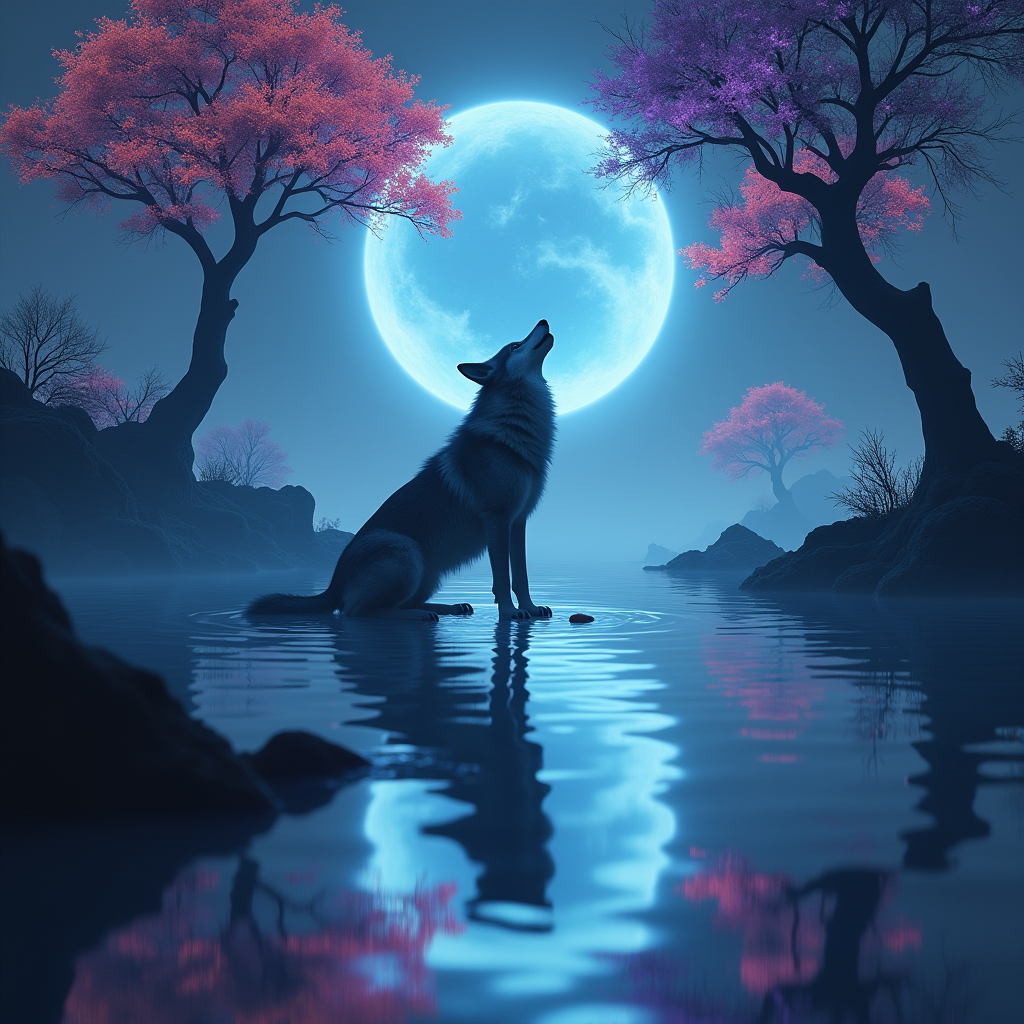

In [4]:
image

In [5]:
upscaled_image = aura_sr.upscale_4x(image)
upscaled_image.size

(4096, 4096)

In [6]:
upscaled_image.save(f'Image Refining/Upscaling/{image_name}.png')

### 3.2 Kandinsky 2 Inpaint

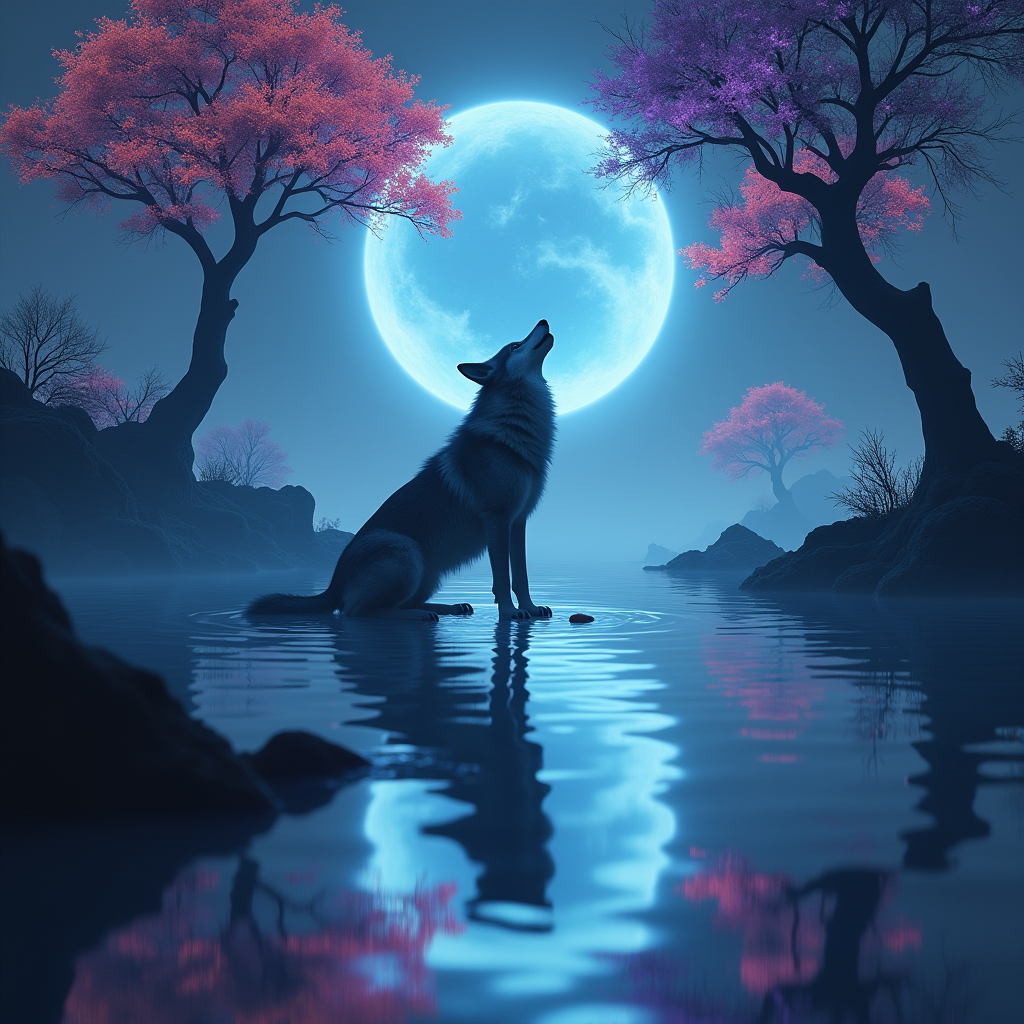

In [2]:
image_name = 'Dreamscape_wolf_3'
image = Image.open(f'Image Generation/FLUX.1/{image_name}.png')
image

In [3]:
mask_gen = MaskGeneration(image)

In [4]:
mask_gen.generate_mask()

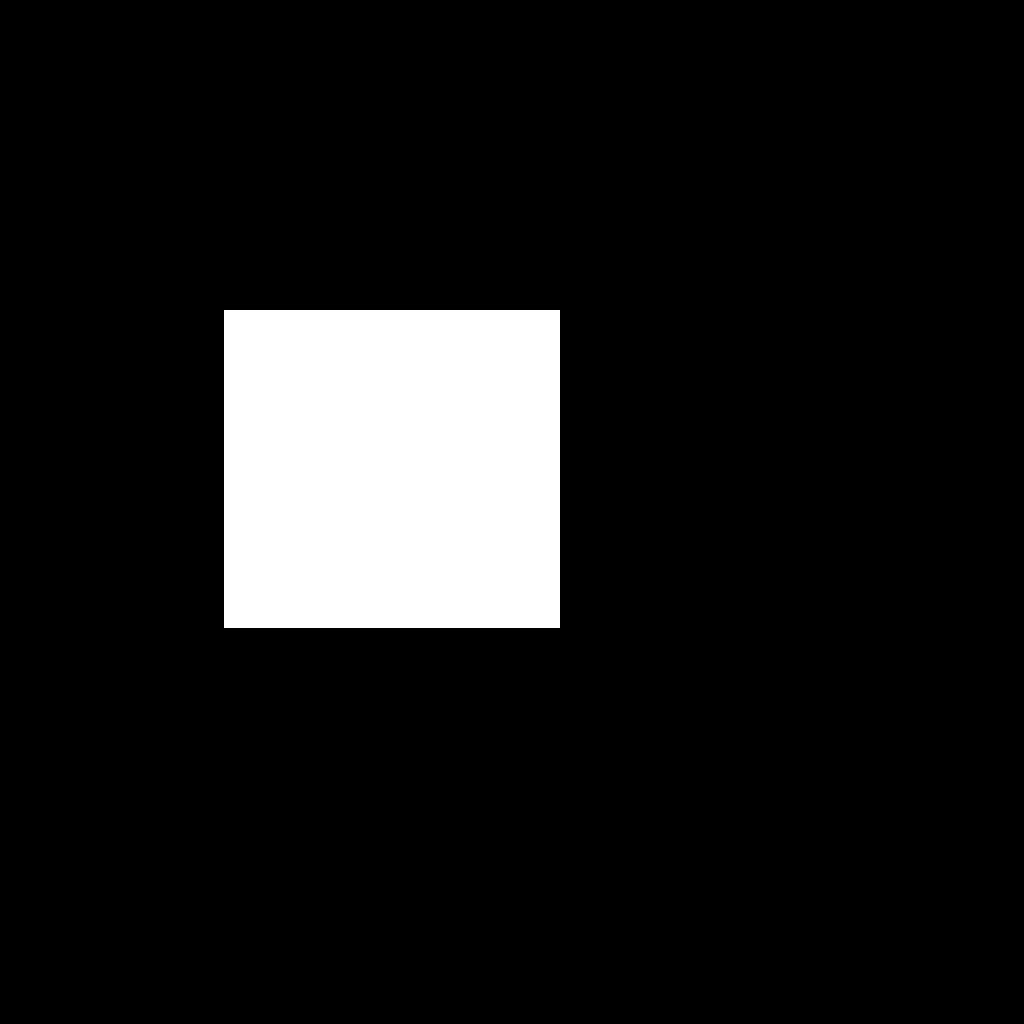

In [5]:
mask = mask_gen.mask
mask

### 3.3 Dreamshaper 8 Inpainting

### 3.4 FLUX.1 Controlnet Inpainting Alpha